🔵 Loading Dataset from Hugging Face...
✅ Dataset Loaded Successfully!

🔵 Dataset Exploration:
Total Poems: 1323

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1323 entries, 0 to 1322
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    1323 non-null   object
 1   content  1314 non-null   object
dtypes: object(2)
memory usage: 20.8+ KB
None

Missing Values:
title      0
content    9
dtype: int64

Poem Length Statistics (Words):
count    1314.000000
mean      131.821918
std        65.158944
min        16.000000
25%        90.000000
50%       115.000000
75%       157.000000
max       511.000000
Name: word_count, dtype: float64

Sample Poem:
------------------------------

بے ٹھکانے ہے دل غمگیں ٹھکانے کی کہو 
شام ہجراں دوستو کچھ اس کے آنے کی کہو 
ہاں نہ پوچھ اک گرفتار قفس کی زندگی 
ہم صفیران چمن کچھ آشیانے کی کہو 
اڑ گیا ہے منزل دشوار میں غم کا سمند 
گیسوئے پر پیچ و خم کے تازیانے کی کہو 
بات بنتی اور باتوں

C:\Users\sherr\AppData\Local\Temp\ipykernel_6096\1373011115.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=common_df, x='Count', y='Word', palette='viridis')
C:\Users\sherr\AppData\Local\Temp\ipykernel_6096\1373011115.py:84: UserWarning: Glyph 1729 (\N{ARABIC LETTER HEH GOAL}) missing from font(s) DejaVu Sans.
  plt.savefig('../results/plots/word_frequency.png') # Save for report
C:\Users\sherr\AppData\Local\Temp\ipykernel_6096\1373011115.py:84: UserWarning: Matplotlib currently does not support Arabic natively.
  plt.savefig('../results/plots/word_frequency.png') # Save for report
C:\Users\sherr\AppData\Local\Temp\ipykernel_6096\1373011115.py:84: UserWarning: Glyph 1746 (\N{ARABIC LETTER YEH BARREE}) missing from font(s) DejaVu Sans.
  plt.savefig('../results/plots/word_frequency.png') # Save for report
C:\Users\sherr\AppData

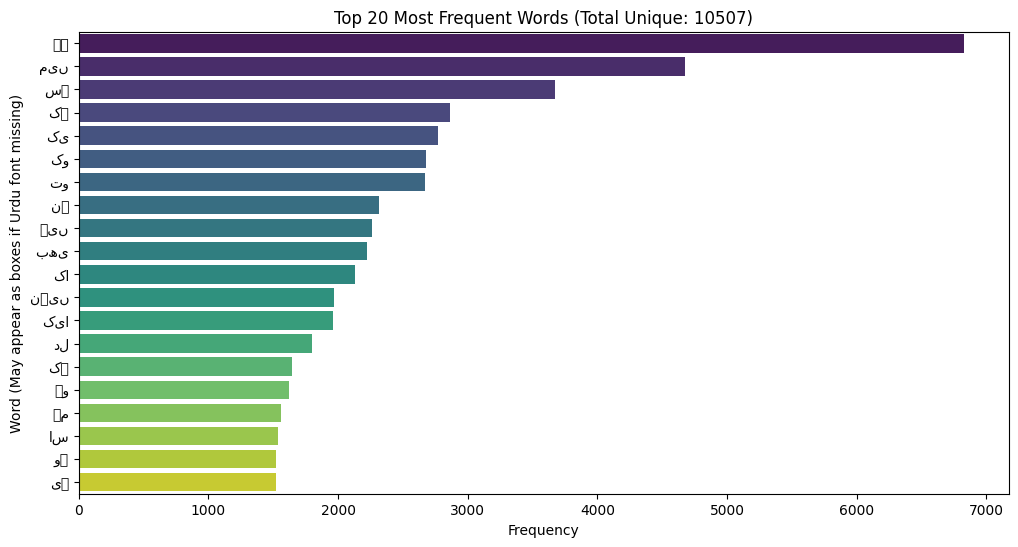

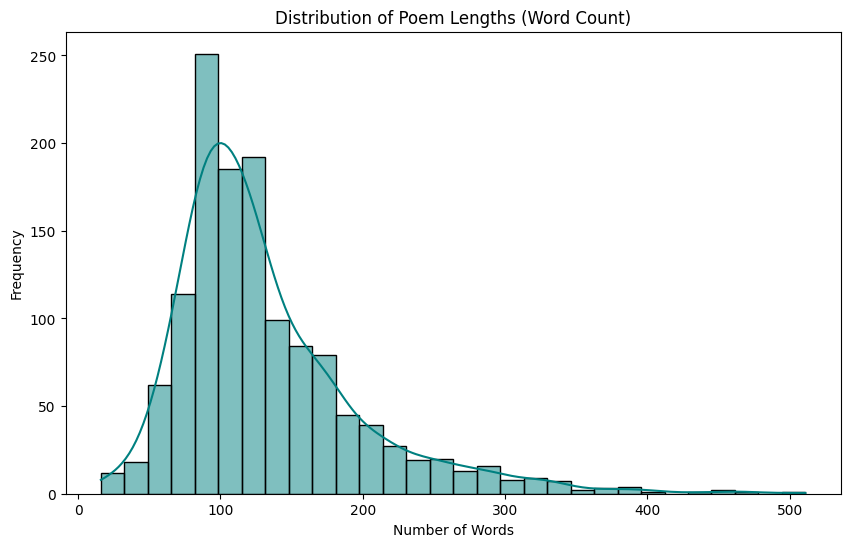


✅ Step 1 Complete. Data saved to ../data/urdu_poetry_raw.csv


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
import os

# Setting up Directories
os.makedirs('../results/plots', exist_ok=True)
os.makedirs('../results/tables', exist_ok=True)

print(" Loading Dataset from Hugging Face...")
try:
    # Loading the dataset 
    dataset = load_dataset("ReySajju742/Urdu-Poetry-Dataset")
    
    # Converting  to Pandas DataFrame for easier manipulation
    df = pd.DataFrame(dataset['train'])
    
    print(" Dataset Loaded Successfully!")
except Exception as e:
    print(f" Error loading dataset: {e}")

print("\n Dataset Exploration:")

# Printing total poems 
total_poems = len(df)
print(f"Total Poems: {total_poems}")

# Checking for columns and basic info
print("\nDataset Info:")
print(df.info())

# Checking for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Dropping rows with missing content if any
df = df.dropna(subset=['content'])

# Analyze poem lengths (character count)
df['char_length'] = df['content'].apply(len) 
df['word_count'] = df['content'].apply(lambda x: len(x.split())) # Helos to count words by splitting on spaces and counting the resulting list

print("\nPoem Length Statistics (Words):")
print(df['word_count'].describe())

print("\nSample Poem:")
print("-" * 30)
print(df.iloc[0]['content'])
print("-" * 30)

#Statistical Analysis

#  Vocabulary Richness
all_text = " ".join(df['content'])
words = all_text.split()
unique_words = set(words)
print(f"\nTotal Words: {len(words)}")
print(f"Unique Words (Vocabulary Size): {len(unique_words)}") # Counting unique words by converting list to set and counting its length

#  Word Frequency Distribution
from collections import Counter
word_counts = Counter(words)
common_words = word_counts.most_common(20)

# Converting to DF for plotting
common_df = pd.DataFrame(common_words, columns=['Word', 'Count'])

#Plotting


plt.figure(figsize=(12, 6))
sns.barplot(data=common_df, x='Count', y='Word', palette='viridis')
plt.title(f"Top 20 Most Frequent Words (Total Unique: {len(unique_words)})")
plt.xlabel("Frequency")
plt.ylabel("Word (May appear as boxes if Urdu font missing)")
plt.savefig('../results/plots/word_frequency.png') # Save for report
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['word_count'], bins=30, kde=True, color='teal')
plt.title("Distribution of Poem Lengths (Word Count)")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.savefig('../results/plots/length_distribution.png') 
plt.show()

df.to_csv('../data/urdu_poetry_raw.csv', index=False)
print("\n Step 1 Complete. Data saved to ../data/urdu_poetry_raw.csv")